
<center><h1>Final Project - <em>Improving Song Discovery Using Music Recommendation Systems</em></h1></center>
<center><h1></h1></center>

<center><h3>Olivia Cho, Richie Zhang, Caroline Anderson, and Finn Eskeland</h3></center>


# EDA and Preproccesing for Spotify Tracks Dataset


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import kagglehub
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# downloading classic hits song data from kaggle
path = kagglehub.dataset_download("thebumpkin/10400-classic-hits-10-genres-1923-to-2023")
file_path = os.path.join(path, 'ClassicHit.csv')
print("Path to dataset files:", path)

dataset1 = pd.read_csv(file_path)
print("Shape:", dataset1.shape)
dataset1.head()

Path to dataset files: /root/.cache/kagglehub/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023/versions/4
Shape: (15150, 18)


,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [ ]:
# Check nulls in dataset1 (Classic Hit Songs)
print("Null Values in Classic Hit Songs Dataset:")
print(dataset1.isnull().sum())

Null Values in Classic Hit Songs Dataset:
Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64


No missing values in the dataset

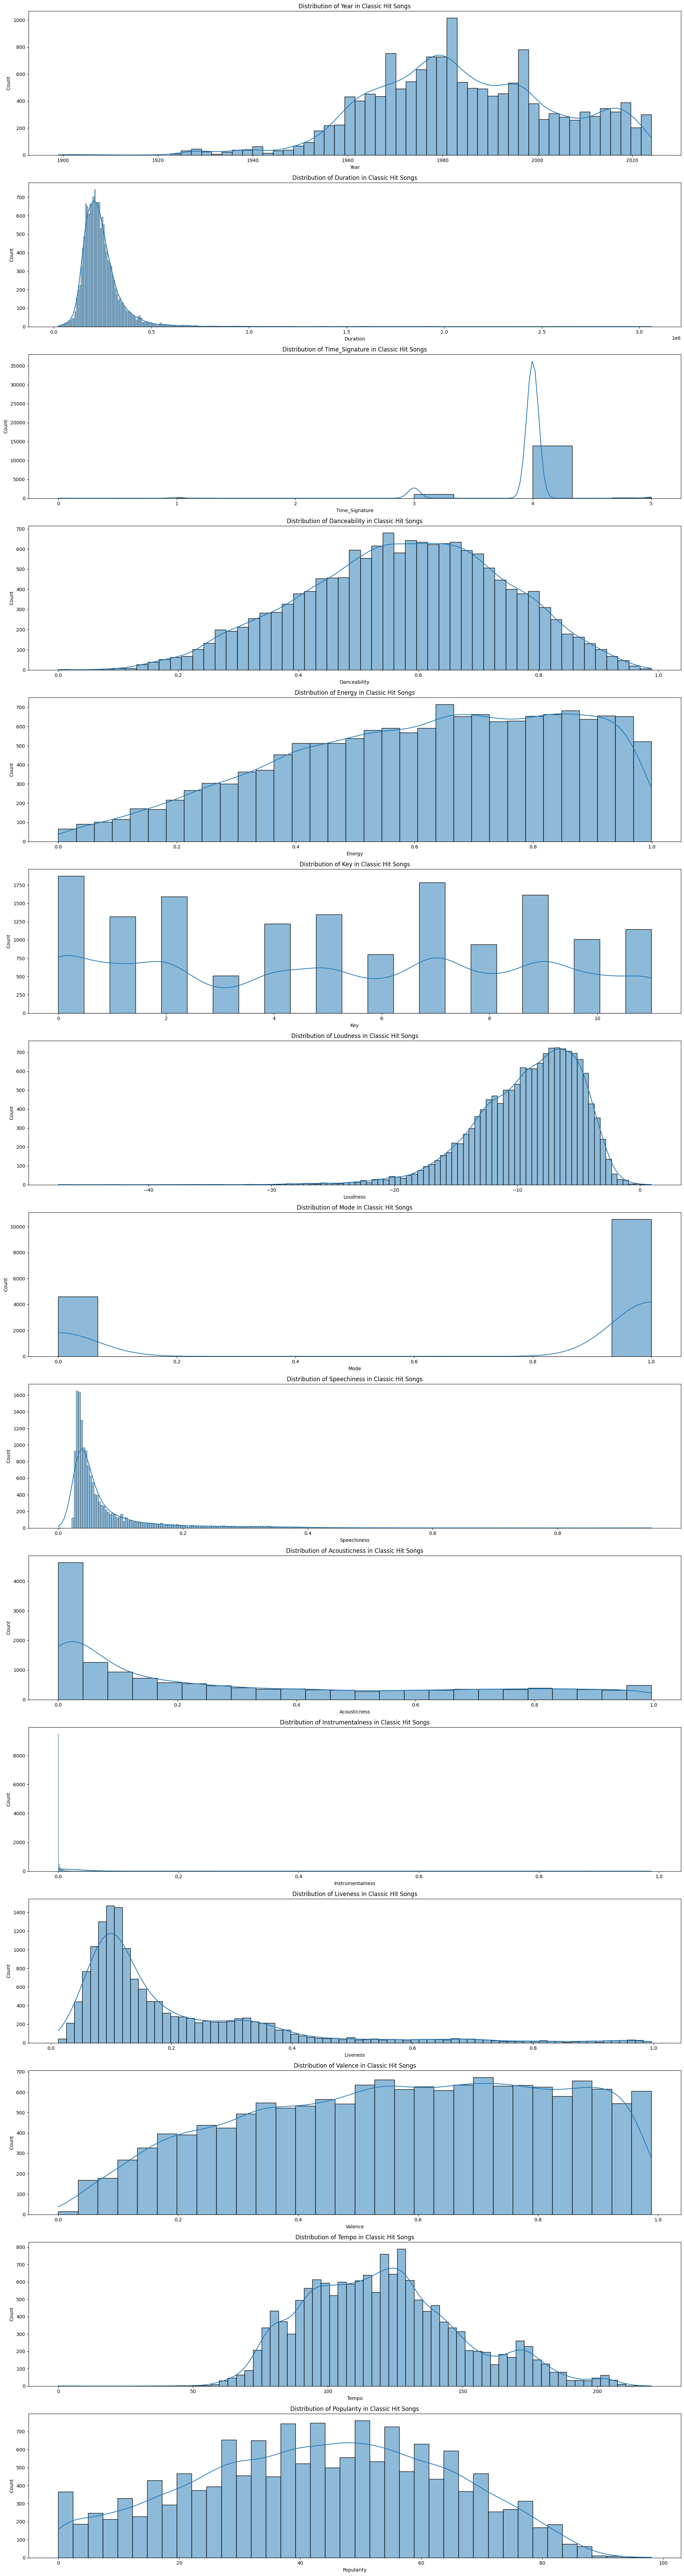

In [ ]:
# Function to identify numerical columns
def get_numeric_columns(df):
    return df.select_dtypes(include=[np.number]).columns

# Get numerical columns for each dataset
numeric_cols1 = get_numeric_columns(dataset1)


# Create distribution plots for dataset1
plt.figure(figsize=(20, 5*len(numeric_cols1)))
for i, col in enumerate(numeric_cols1, 1):
    plt.subplot(len(numeric_cols1), 1, i)
    sns.histplot(data=dataset1, x=col, kde=True)
    plt.title(f'Distribution of {col} in Classic Hit Songs')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Print all unique values of Time_Signature, Key, and mode

In [ ]:
print("Unique Time Signatures:")
print(dataset1['Time_Signature'].unique())
print("\nCount of each Time Signature:")
print(dataset1['Time_Signature'].value_counts())

print("\n" + "="*50 + "\n")

print("Unique Keys:")
print(dataset1['Key'].unique())
print("\nCount of each Key:")
print(dataset1['Key'].value_counts())

print("\n" + "="*50 + "\n")

print("Unique Modes:")
print(dataset1['Mode'].unique())
print("\nCount of each Mode:")
print(dataset1['Mode'].value_counts())

Unique Time Signatures:
[4 3 1 5 0]

Count of each Time Signature:
Time_Signature
4    13905
3     1047
5      114
1       82
0        2
Name: count, dtype: int64


Unique Keys:
[ 6  1  9  2 10  3 11  7  4  0  8  5]

Count of each Key:
Key
0     1872
7     1782
9     1614
2     1592
5     1349
1     1317
4     1220
11    1144
10    1008
8      939
6      804
3      509
Name: count, dtype: int64


Unique Modes:
[1 0]

Count of each Mode:
Mode
1    10554
0     4596
Name: count, dtype: int64


**Time_Signature** indicates how many beats there are in a measure (usually 4 or 3). Since time signature is a categorical variable with no ordinal relationship, I will use one hot encoding. Be sure to leave one of them out to prevent multicollinearity if we are using them.

The **Key** column represents the key of the song, from A to G# (mapped to categories 0-11). I will use cyclical encoding using sin and cos as it ensures that Key=0 and Key=11 are treated as close, which aligns with the natural properties of the musical key.

The **Mode** column is a binary variable. 1 represents major key, 0 represents minor key.





In [ ]:
# Scale loudness from 0 to 1 to keep song features consistent
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
loudness_scaled = scaler.fit_transform(dataset1[['Loudness']]).flatten()
dataset1['Loudness_Scaled'] = loudness_scaled

# Display the original and scaled values for comparison
print("Original and Scaled Loudness Values (First 5 rows):")
print(dataset1[['Loudness', 'Loudness_Scaled']].head())
print("\nScaling Verification:")
print(f"Minimum scaled value: {dataset1['Loudness_Scaled'].min():.4f}")
print(f"Maximum scaled value: {dataset1['Loudness_Scaled'].max():.4f}")

Original and Scaled Loudness Values (First 5 rows):
   Loudness  Loudness_Scaled
0   -15.894         0.651746
1   -17.453         0.619454
2    -7.293         0.829902
3   -10.057         0.772650
4    -6.310         0.850263

Scaling Verification:
Minimum scaled value: 0.0000
Maximum scaled value: 1.0000


In [ ]:
time_sig_encoded = pd.get_dummies(dataset1['Time_Signature'], prefix='time_sig')
time_sig_encoded

,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
15145,False,False,False,True,False
15146,False,False,False,True,False
15147,False,False,False,True,False
15148,False,False,False,True,False


In [ ]:
# Assuming `data['Key']` contains the keys as integers 0-11
dataset1['key_sin'] = np.sin(2 * np.pi * dataset1['Key'] / 12)
dataset1['key_cos'] = np.cos(2 * np.pi * dataset1['Key'] / 12)


In [ ]:
dataset1

,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre,Loudness_Scaled,key_sin,key_cos
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,...,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock,0.651746,1.224647e-16,-1.000000e+00
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,...,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock,0.619454,5.000000e-01,8.660254e-01
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,...,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock,0.829902,-1.000000e+00,-1.836970e-16
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,...,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock,0.772650,8.660254e-01,5.000000e-01
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,...,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock,0.850263,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,4,0.679,0.659,1,-10.826,0,...,0.07710,0.000004,0.3160,0.528,154.171,47,World,0.756721,5.000000e-01,8.660254e-01
15146,Birima,Youssou N'Dour,1995,228373,4,0.692,0.737,10,-7.042,1,...,0.25400,0.017400,0.1120,0.808,105.754,18,World,0.835101,-8.660254e-01,5.000000e-01
15147,Set,Youssou N'Dour,2004,226826,4,0.733,0.730,0,-11.056,1,...,0.04240,0.000101,0.0282,0.840,146.213,25,World,0.751957,0.000000e+00,1.000000e+00
15148,Africa Remembers,Youssou N'Dour,2007,560466,4,0.696,0.378,5,-16.181,0,...,0.44400,0.019400,0.0850,0.551,97.677,8,World,0.645801,5.000000e-01,-8.660254e-01


In [ ]:
# Create a new DataFrame by dropping the specified columns
df = dataset1.drop(columns=['Time_Signature', 'Key', 'Loudness'])

df = pd.concat([df, time_sig_encoded], axis=1)
df = df.rename(columns={'Loudness_Scaled': 'Loudness'})
df

,Track,Artist,Year,Duration,Danceability,Energy,Mode,Speechiness,Acousticness,Instrumentalness,...,Popularity,Genre,Loudness,key_sin,key_cos,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,0.616,0.511,1,0.0279,0.03840,0.000000,...,40,Alt. Rock,0.651746,1.224647e-16,-1.000000e+00,False,False,False,True,False
1,Like the Weather,"10,000 Maniacs",1987,236653,0.770,0.459,1,0.0416,0.11200,0.003430,...,43,Alt. Rock,0.619454,5.000000e-01,8.660254e-01,False,False,False,True,False
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,0.593,0.816,1,0.0410,0.00449,0.000032,...,12,Alt. Rock,0.829902,-1.000000e+00,-1.836970e-16,False,False,False,True,False
3,Trouble Me,"10,000 Maniacs",1989,193560,0.861,0.385,1,0.0341,0.15400,0.000000,...,47,Alt. Rock,0.772650,8.660254e-01,5.000000e-01,False,False,False,True,False
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,0.622,0.876,1,0.0305,0.01930,0.006840,...,43,Alt. Rock,0.850263,-8.660254e-01,5.000000e-01,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,0.679,0.659,0,0.0269,0.07710,0.000004,...,47,World,0.756721,5.000000e-01,8.660254e-01,False,False,False,True,False
15146,Birima,Youssou N'Dour,1995,228373,0.692,0.737,1,0.0512,0.25400,0.017400,...,18,World,0.835101,-8.660254e-01,5.000000e-01,False,False,False,True,False
15147,Set,Youssou N'Dour,2004,226826,0.733,0.730,1,0.0479,0.04240,0.000101,...,25,World,0.751957,0.000000e+00,1.000000e+00,False,False,False,True,False
15148,Africa Remembers,Youssou N'Dour,2007,560466,0.696,0.378,0,0.0797,0.44400,0.019400,...,8,World,0.645801,5.000000e-01,-8.660254e-01,False,False,False,True,False


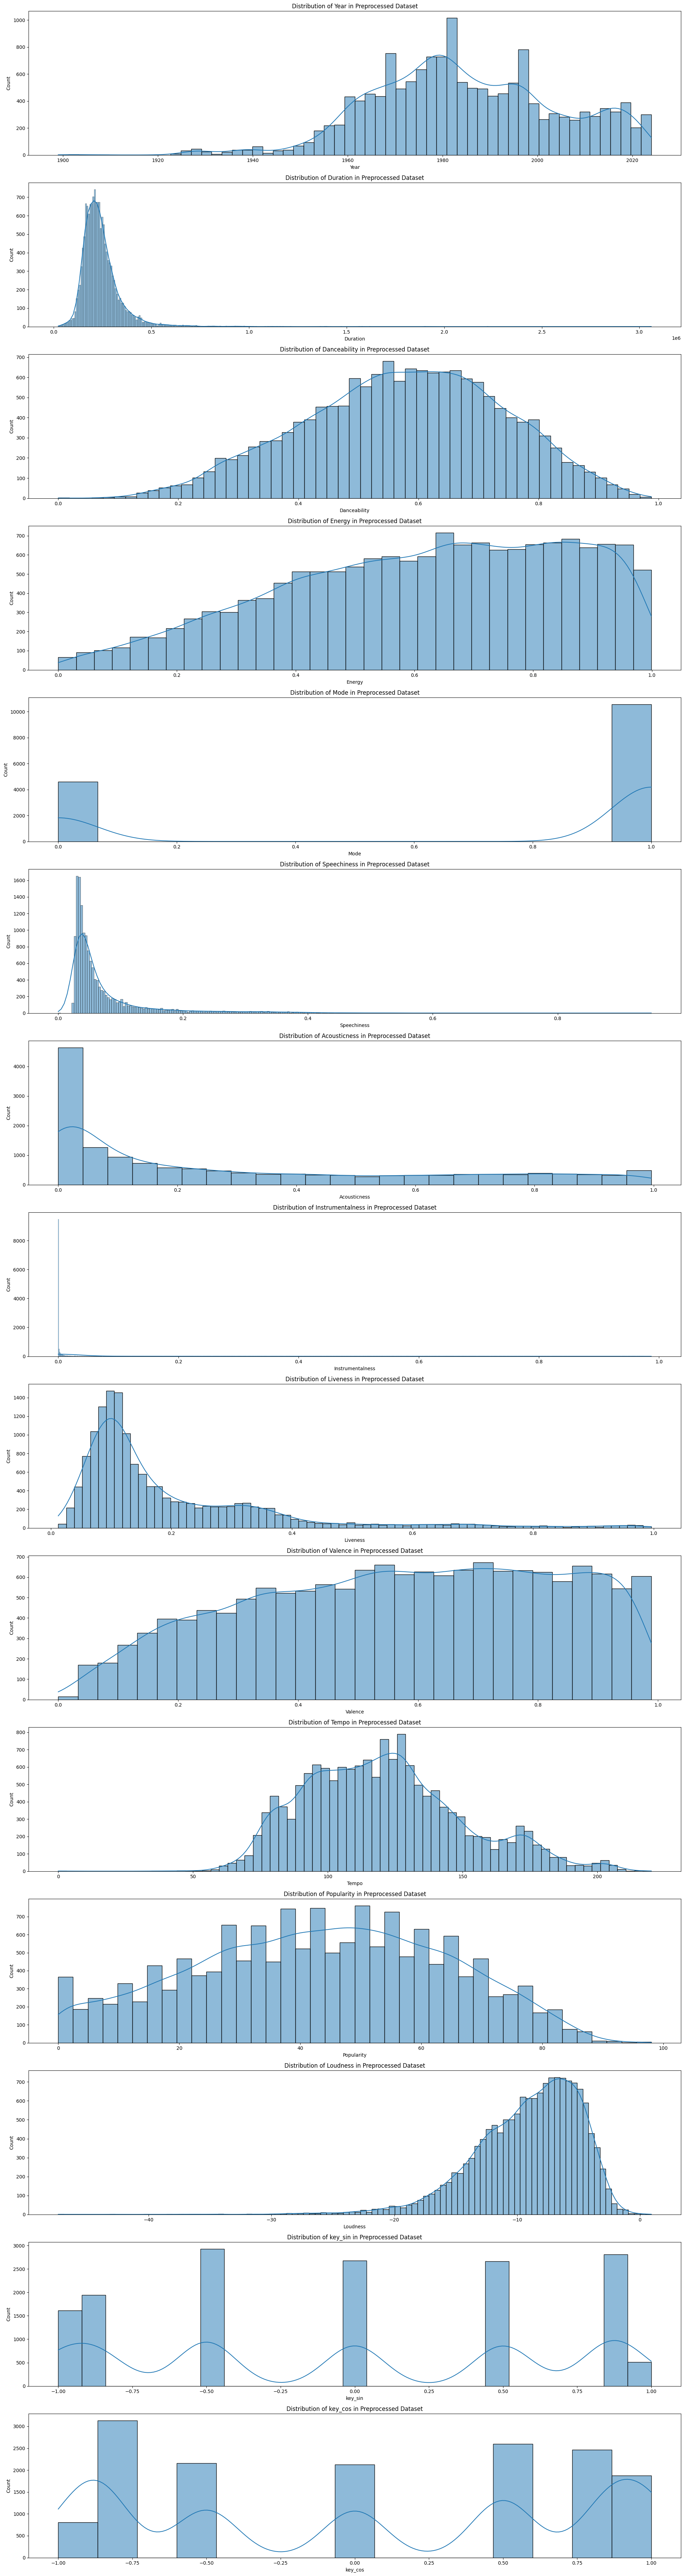

In [ ]:
# Get numerical columns
numeric_cols = get_numeric_columns(df)

# Create distribution plots for df
plt.figure(figsize=(20, 5*len(numeric_cols)))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(data=dataset1, x=col, kde=True)
    plt.title(f'Distribution of {col} in Preprocessed Dataset')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


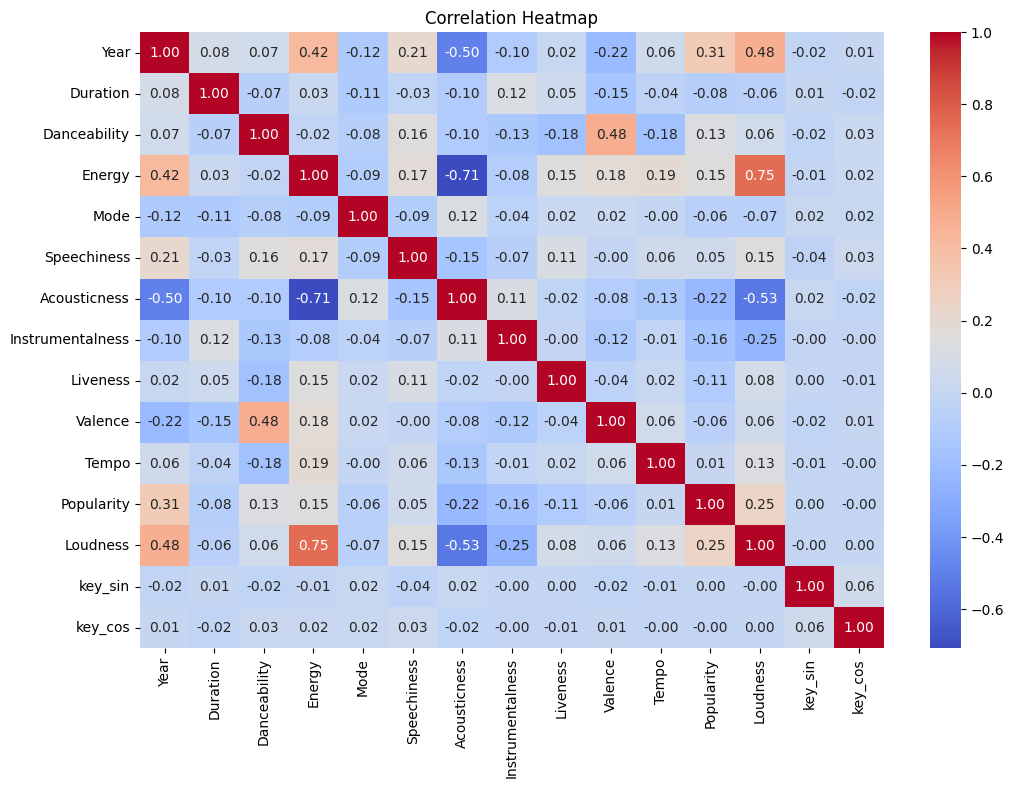

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.describe()

,Year,Duration,Danceability,Energy,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Loudness,key_sin,key_cos
count,15150.000000,1.515000e+04,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,15150.000000,1.515000e+04
mean,1984.709769,2.413028e+05,0.574667,0.617691,0.696634,0.075791,0.302651,0.091046,0.200062,0.571146,120.664078,43.025809,0.791343,-0.032072,4.675003e-02
std,19.482460,1.057966e+05,0.166208,0.239527,0.459727,0.077704,0.317793,0.229075,0.175196,0.250969,29.181107,20.788038,0.088851,0.683378,7.279053e-01
min,1899.000000,2.300000e+04,0.000000,0.000098,0.000000,0.000000,0.000001,0.000000,0.012400,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00
25%,1971.000000,1.803700e+05,0.461000,0.442000,0.000000,0.034325,0.024225,0.000000,0.091900,0.371000,98.672500,28.000000,0.737857,-0.500000,-8.660254e-01
50%,1983.000000,2.228525e+05,0.582000,0.644000,1.000000,0.046400,0.167000,0.000084,0.130000,0.586000,118.777000,44.000000,0.805305,0.000000,-1.836970e-16
75%,1998.000000,2.751530e+05,0.696000,0.819000,1.000000,0.078400,0.557000,0.012400,0.257000,0.782000,138.073250,59.000000,0.857606,0.500000,8.660254e-01
max,2024.000000,3.060650e+06,0.988000,0.999000,1.000000,0.950000,0.996000,0.987000,0.996000,0.989000,219.973000,98.000000,1.000000,1.000000,1.000000e+00


In [ ]:
df.columns

Index(['Track', 'Artist', 'Year', 'Duration', 'Danceability', 'Energy', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Popularity', 'Genre', 'Loudness', 'key_sin',
       'key_cos', 'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4',
       'time_sig_5'],
      dtype='object')

Explanation of Features in df after preprocessing:

- Danceability:
  - Audio feature provided by the Spotify API.Ittries to quantify how easy it is to dance to the song (presumably capturing tempoand beat), and varies from 0 to 1

- Energy:
  - Intense songs have more energy, softer/melodic songs lower energy, it varies from 0 to

- Mode:  
  - 1 = song is in major, 0 = song is in minor

- Speechiness:
  - quantifies how much of the song is spoken, varying from 0 (fully instrumental songs) to 1 (songs that consist entirely of spoken words)

- Acousticness:
  - How acoustic the song is from 0 to 1

- Instrumentalness:
  - basically the inverse of speechiness, varying from 0 to 1

- Liveness:
  - quantifies how likely the recording was live in front of an audience (values close to 1) vs. how likely it was recorded in a studio without a live audience (values close to 0)

- Valence:
  - quantifies how uplifting a song is. Songs with a positive mood =close to 1 and songs with a negative mood =close to

- Tempo:  
  - the speed of the song in BPM

- Popularity:
  - an integer from 0 to 100, higher corresponds to higher plays on spotify

- Loudness:
  - how loud the song is from 0 to 1

- key sin and key cos:
  - cyclical encoding of key

- time sig x:
  - one hot encoded time signatures


In [ ]:
df

,Track,Artist,Year,Duration,Danceability,Energy,Mode,Speechiness,Acousticness,Instrumentalness,...,Popularity,Genre,Loudness,key_sin,key_cos,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,0.616,0.511,1,0.0279,0.03840,0.000000,...,40,Alt. Rock,0.651746,1.224647e-16,-1.000000e+00,False,False,False,True,False
1,Like the Weather,"10,000 Maniacs",1987,236653,0.770,0.459,1,0.0416,0.11200,0.003430,...,43,Alt. Rock,0.619454,5.000000e-01,8.660254e-01,False,False,False,True,False
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,0.593,0.816,1,0.0410,0.00449,0.000032,...,12,Alt. Rock,0.829902,-1.000000e+00,-1.836970e-16,False,False,False,True,False
3,Trouble Me,"10,000 Maniacs",1989,193560,0.861,0.385,1,0.0341,0.15400,0.000000,...,47,Alt. Rock,0.772650,8.660254e-01,5.000000e-01,False,False,False,True,False
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,0.622,0.876,1,0.0305,0.01930,0.006840,...,43,Alt. Rock,0.850263,-8.660254e-01,5.000000e-01,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,0.679,0.659,0,0.0269,0.07710,0.000004,...,47,World,0.756721,5.000000e-01,8.660254e-01,False,False,False,True,False
15146,Birima,Youssou N'Dour,1995,228373,0.692,0.737,1,0.0512,0.25400,0.017400,...,18,World,0.835101,-8.660254e-01,5.000000e-01,False,False,False,True,False
15147,Set,Youssou N'Dour,2004,226826,0.733,0.730,1,0.0479,0.04240,0.000101,...,25,World,0.751957,0.000000e+00,1.000000e+00,False,False,False,True,False
15148,Africa Remembers,Youssou N'Dour,2007,560466,0.696,0.378,0,0.0797,0.44400,0.019400,...,8,World,0.645801,5.000000e-01,-8.660254e-01,False,False,False,True,False


# EDA and Preprocessing for Spotify Playlists Dataset


# First, the Spotify Playlists dataset **itself**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("andrewmvd/spotify-playlists")
file_path = os.path.join(path, 'spotify_dataset.csv')

print("Path to dataset files:", file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/spotify-playlists/versions/1/spotify_dataset.csv


In [ ]:
spotify_playlists = pd.read_csv(file_path, on_bad_lines='skip')
spotify_playlists.shape

(12891680, 4)

In [ ]:
spotify_playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB


In [ ]:
# checkout dataframe
spotify_playlists.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [ ]:
# clean up column names
spotify_playlists.columns = spotify_playlists.columns.str.replace('"', '')
spotify_playlists.columns = spotify_playlists.columns.str.replace('name', '')
spotify_playlists.columns = spotify_playlists.columns.str.replace(' ', '')
spotify_playlists.columns

Index(['user_id', 'artist', 'track', 'playlist'], dtype='object')

In [ ]:
# check for missing values
spotify_playlists.isnull().sum()

,0
user_id,0
artist,33572
track,88
playlist,1246


In [ ]:
# deciding that the dataset is large enough that we can just drop null rows
spotify_playlists.dropna(inplace=True)
spotify_playlists.isnull().sum()

,0
user_id,0
artist,0
track,0
playlist,0


In [ ]:
# check for duplicates
spotify_playlists.duplicated().sum()

3

In [ ]:
# drop duplicates
spotify_playlists.drop_duplicates(inplace=True)
spotify_playlists.duplicated().sum()

0

In [ ]:
# drop artists that appear 50 or less time
spotify_playlists = spotify_playlists.groupby('artist').filter(lambda x: len(x) > 50)

# drop users with less than 10 unique artists
spotify_playlists = spotify_playlists[spotify_playlists.groupby('user_id').artist.transform('nunique') >= 10]

In [ ]:
# top 10 artists
spotify_playlists['artist'].value_counts().head(10)

,count
artist,
Daft Punk,35833
Coldplay,35327
Radiohead,31236
The Rolling Stones,30696
Kanye West,28968
JAY Z,28789
Eminem,28779
Queen,27993
David Bowie,27737


In [ ]:
# top frequent tracks
spotify_playlists[['track', 'artist']].value_counts().head(10)

,,count
track,artist,
Midnight City,M83,2601
Get Lucky - Radio Edit,Daft Punk,2326
Radioactive,Imagine Dragons,2322
Little Talks,Of Monsters and Men,2245
Wake Me Up,Avicii,2230
Royals,Lorde,2207
Ho Hey,The Lumineers,2172
Can't Hold Us - feat. Ray Dalton,Macklemore & Ryan Lewis,2057
Pompeii,Bastille,2004


<Axes: >

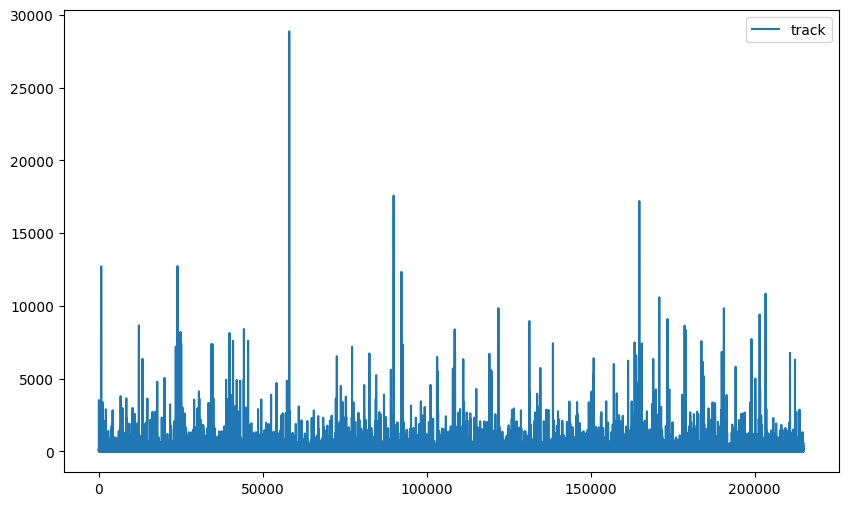

In [ ]:
# plot playlist length
spotify_playlists.groupby(["user_id", "playlist"], as_index=False)['track'].nunique().plot(figsize=(10,6))

In [ ]:
# lets look at the longest playlists
spotify_playlists.groupby(["user_id", "playlist"], as_index=False)['track'].nunique().sort_values(by=['track'], ascending=False).head(10)

,user_id,playlist,track
58060,4398de6902abde3351347b048fcdc287,Starred,28865
89887,68756b4d60b6fac27789e85c2b63d1c6,Starred,17570
164816,c410ee930bd5f0e4893632503ec17b05,Starred,17195
23998,1c43b609f0b4a55de35803000c86ade0,Starred,12726
725,00dd7fde8040db835d917e077bb47e4b,Starred,12718
92274,6b85a8076b4f3b1036ef15f09e2feeeb,Generos,12329
203313,f2604a69836c94d00fcd11dd602944fc,everything,10835
170902,cba242053229db043497e4dd284b025f,Starred,10576
121847,8ece433d541d9fac7fbd7c0c6082c7a6,Musica!,9837
190607,e3833c156aef7b25ba9d8837341a99bb,All Live Files,9827


* note - "starred" is the liked songs of a user, so lets set this aside

In [ ]:

starred_playlists = spotify_playlists[spotify_playlists['playlist'] == 'Starred']
starred_playlists.shape

non_starred_playlists = spotify_playlists[spotify_playlists['playlist'] != 'Starred']
non_starred_playlists.shape

(10030622, 4)

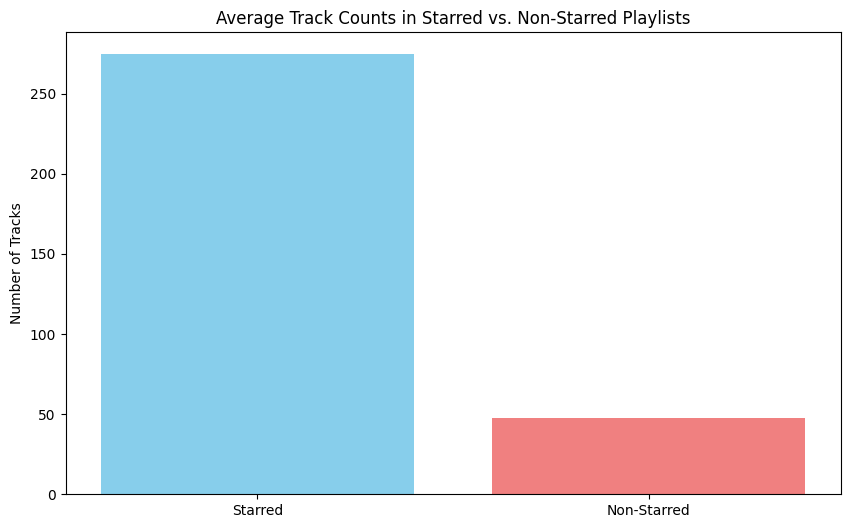

In [ ]:
# lets investigate starred playlists...

playlist_track_counts = spotify_playlists.groupby(["user_id", "playlist"], as_index=False)['track'].nunique()

# Separate starred and non-starred playlists
starred_counts = playlist_track_counts[playlist_track_counts['playlist'] == 'Starred']['track']
non_starred_counts = playlist_track_counts[playlist_track_counts['playlist'] != 'Starred']['track']

# Calculate mean and median for both groups
mean_starred = np.mean(starred_counts)
mean_non_starred = np.mean(non_starred_counts)

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(['Starred', 'Non-Starred'],
        [mean_starred, mean_non_starred],
       color=['skyblue', 'lightcoral'])
plt.ylabel('Number of Tracks')
plt.title('Average Track Counts in Starred vs. Non-Starred Playlists')
plt.show()

In [ ]:
# dropping starred playlists
spotify_playlists = spotify_playlists[spotify_playlists['playlist'] != 'Starred']

In [ ]:
# looking at tracks with the highest user count
# (different from frequency, a user might have a track in multiple playlists)

spotify_playlists.groupby(["track", "artist"], as_index=False)["user_id"].nunique().sort_values(by=["user_id"], ascending=False).head(5)

,track,artist,user_id
918674,Midnight City,M83,1649
1138505,Radioactive,Imagine Dragons,1516
516708,Get Lucky - Radio Edit,Daft Punk,1513
1577068,Wake Me Up,Avicii,1461
1185428,Royals,Lorde,1440


# now the spotify tracks dataset:
- Here we will just perform the same exact preprocessing as on the classic hits dataset

In [ ]:
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
file_path = os.path.join(path, 'dataset.csv')
print("Path to dataset files:", path)

spotify_tracks = pd.read_csv(file_path)
spotify_tracks.info()

Path to dataset files: /root/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticnes

In [ ]:
spotify_tracks.drop(columns=['Unnamed: 0', 'album_name'], axis=1, inplace=True)

In [ ]:
def get_numeric_columns(df):
    return df.select_dtypes(include=[np.number]).columns

numeric_columns = get_numeric_columns(spotify_tracks)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
loudness_scaled = scaler.fit_transform(spotify_tracks[['loudness']]).flatten()
spotify_tracks['loudness_scaled'] = loudness_scaled

# Display the original and scaled values for comparison
print("Original and Scaled Loudness Values (First 5 rows):")
print(spotify_tracks[['loudness', 'loudness_scaled']].head())
print("\nScaling Verification:")
print(f"Minimum scaled value: {spotify_tracks['loudness_scaled'].min():.4f}")
print(f"Maximum scaled value: {spotify_tracks['loudness_scaled'].max():.4f}")

Original and Scaled Loudness Values (First 5 rows):
   loudness  loudness_scaled
0    -6.746         0.791392
1   -17.235         0.597377
2    -9.734         0.736123
3   -18.515         0.573701
4    -9.681         0.737103

Scaling Verification:
Minimum scaled value: 0.0000
Maximum scaled value: 1.0000


In [ ]:
time_sig_encoded = pd.get_dummies(spotify_tracks['time_signature'], prefix='time_sig')
time_sig_encoded

,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,True,False,False
4,False,False,False,True,False
...,...,...,...,...,...
113995,False,False,False,False,True
113996,False,False,False,True,False
113997,False,False,False,True,False
113998,False,False,False,True,False


In [ ]:
spotify_tracks['key_sin'] = np.sin(2 * np.pi * spotify_tracks['key'] / 12)
spotify_tracks['key_cos'] = np.cos(2 * np.pi * spotify_tracks['key'] / 12)

In [ ]:
spotify_tracks = spotify_tracks.drop(columns=['time_signature', 'key', 'loudness'])

spotify_tracks = pd.concat([spotify_tracks, time_sig_encoded], axis=1)
spotify_tracks = spotify_tracks.rename(columns={'loudness_scaled': 'loudness'})
spotify_tracks

,track_id,artists,track_name,popularity,duration_ms,explicit,danceability,energy,mode,speechiness,...,tempo,track_genre,loudness,key_sin,key_cos,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,0,0.1430,...,87.917,acoustic,0.791392,0.500000,0.866025,False,False,False,True,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55,149610,False,0.420,0.1660,1,0.0763,...,77.489,acoustic,0.597377,0.500000,0.866025,False,False,False,True,False
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,1,0.0557,...,76.332,acoustic,0.736123,0.000000,1.000000,False,False,False,True,False
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,71,201933,False,0.266,0.0596,1,0.0363,...,181.740,acoustic,0.573701,0.000000,1.000000,False,False,True,False,False
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,1,0.0526,...,119.949,acoustic,0.737103,0.866025,0.500000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,Sleep My Little Boy,21,384999,False,0.172,0.2350,1,0.0422,...,125.995,world-music,0.612952,0.500000,-0.866025,False,False,False,False,True
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,Water Into Light,22,385000,False,0.174,0.1170,0,0.0401,...,85.239,world-music,0.577345,0.000000,1.000000,False,False,False,True,False
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Miss Perfumado,22,271466,False,0.629,0.3290,0,0.0420,...,132.378,world-music,0.714648,0.000000,1.000000,False,False,False,True,False
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Friends,41,283893,False,0.587,0.5060,1,0.0297,...,135.960,world-music,0.714759,-0.500000,-0.866025,False,False,False,True,False


In [ ]:
spotify_tracks.dropna(inplace=True)

### merge datasets:



In [ ]:
import pandas as pd

def add_track_ids(playlists_dataset, spotify_tracks):
    """
    Add track_id to playlists_dataset by matching track and artist names.

    Args:
        playlists_dataset (pd.DataFrame): Playlist dataset with 'track' and 'artist' columns.
        spotify_tracks (pd.DataFrame): Spotify dataset with 'track_name', 'artists', and 'track_id'.

    Returns:
        pd.DataFrame: Updated playlists_dataset with a new 'track_id' column.
    """
    # Normalize columns for matching
    playlists_dataset['track_normalized'] = playlists_dataset['track'].str.strip().str.lower()
    playlists_dataset['artist_normalized'] = playlists_dataset['artist'].str.strip().str.lower()
    spotify_tracks['track_name_normalized'] = spotify_tracks['track_name'].str.strip().str.lower()
    spotify_tracks['artists_normalized'] = spotify_tracks['artists'].str.strip().str.lower()

    # Merge datasets on normalized columns
    merged = pd.merge(
        playlists_dataset,
        spotify_tracks[['track_name_normalized', 'artists_normalized', 'track_id']],
        how='left',
        left_on=['track_normalized', 'artist_normalized'],
        right_on=['track_name_normalized', 'artists_normalized']
    )

    # Drop intermediate normalized columns
    merged = merged.drop(['track_normalized', 'artist_normalized', 'track_name_normalized', 'artists_normalized'], axis=1)

    return merged


# Add track_id
playlists_with_ids = add_track_ids(spotify_playlists, spotify_tracks)

# Print a preview of the result
playlists_with_ids.head()

,user_id,artist,track,playlist,track_id
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,NaN
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,NaN
2,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,5hNd3UB2VG6M38kqgTHE3o
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,2HcE0UBhTeY1LYj4VcseJZ
4,9cc0cfd4d7d7885102480dd99e7a90d6,Lissie,All Be Okay,HARD ROCK 2010,NaN


In [ ]:
# Count NaN values in 'track_id' for unique track-artist pairs
nan_track_ids = playlists_with_ids[playlists_with_ids['track_id'].isna()]
unique_nan_pairs = nan_track_ids[['track', 'artist']].drop_duplicates()
num_unique_nan_pairs = len(unique_nan_pairs)

print(f"Number of unique track-artist pairs with NaN track_id: {num_unique_nan_pairs}")

Number of unique track-artist pairs with NaN track_id: 1677371


In [ ]:
# Drop rows where 'track_id' is NaN
playlists_with_ids.dropna(subset=['track_id'], inplace=True)

In [ ]:
playlists_with_ids.shape

(2227423, 5)

In [ ]:
def add_genre_to_playlists(playlists_with_ids, spotify_tracks):
    """
    Adds the genre to the playlists_with_ids DataFrame.

    Args:
        playlists_with_ids (pd.DataFrame): DataFrame with track IDs.
        spotify_tracks (pd.DataFrame): DataFrame with track information, including genre.

    Returns:
        pd.DataFrame: playlists_with_ids DataFrame with an added 'genre' column.
    """

    # Merge based on 'track_id'
    playlists_with_genre = pd.merge(
        playlists_with_ids,
        spotify_tracks[['track_id', 'track_genre']],  # Assuming 'genre' column exists
        on='track_id',
        how='left'
    )

    return playlists_with_genre

# Call the function to add the genre
playlists_with_genre = add_genre_to_playlists(playlists_with_ids, spotify_tracks)

In [ ]:
spotify_tracks.dropna(inplace=True)

playlist_stats = playlists_with_ids.groupby('playlist')['track_id'].agg(lambda x: list(x)).reset_index()

def aggregate_playlist_features(track_ids):
    track_features = spotify_tracks[spotify_tracks['track_id'].isin(track_ids)]

    # Exclude specified columns
    excluded_columns = ['artists', 'album_name', 'track_name', 'explicit']
    track_features = track_features.drop(columns=excluded_columns, errors='ignore')

    # Aggregate statistics
    agg_stats = {}
    for col in track_features.select_dtypes(include=np.number).columns:
        if col != 'track_id':
            agg_stats[col + '_mean'] = track_features[col].mean()

    # Mode for 'track_genre'
    agg_stats['track_genre_mode'] = track_features['track_genre'].mode().iloc[0] if not track_features['track_genre'].mode().empty else None

    # Handle time signature boolean features
    time_sig_features = ['time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4', 'time_sig_5']
    time_sig_counts = track_features[time_sig_features].sum()
    most_common_time_sig = time_sig_counts.idxmax() if not time_sig_counts.empty else None

    # Set the most common time_sig feature to True, others to False
    for feature in time_sig_features:
        agg_stats[feature] = (feature == most_common_time_sig)

    return agg_stats

# Apply the aggregation function to each playlist
playlist_stats['agg_features'] = playlist_stats['track_id'].apply(aggregate_playlist_features)

# Expand the 'agg_features' column into separate columns
playlist_stats = pd.concat([playlist_stats, playlist_stats['agg_features'].apply(pd.Series)], axis=1)
playlist_stats.drop(columns=['agg_features', 'track_id'], inplace=True)

# Print the resulting DataFrame

In [ ]:
playlist_tracks = playlists_with_ids.groupby('playlist')['track'].agg(lambda x: list(x.unique())).reset_index()
playlist_stats = pd.merge(playlist_stats, playlist_tracks, on='playlist', how='left')
playlist_stats = playlist_stats.rename(columns={'track': 'playlist_tracks'})

In [ ]:
# Mapping for renaming columns
column_mapping = {
    'popularity_mean': 'Popularity',
    'duration_ms_mean': 'Duration',
    'danceability_mean': 'Danceability',
    'energy_mean': 'Energy',
    'mode_mean': 'Mode',
    'speechiness_mean': 'Speechiness',
    'acousticness_mean': 'Acousticness',
    'instrumentalness_mean': 'Instrumentalness',
    'liveness_mean': 'Liveness',
    'valence_mean': 'Valence',
    'tempo_mean': 'Tempo',
    'loudness_mean': 'Loudness',
    'key_sin_mean': 'key_sin',
    'key_cos_mean': 'key_cos',
    'track_genre_mode': 'Genre',
    # The boolean time_sig_* columns already match
}

# Rename columns in playlist_stats
playlist_stats.rename(columns=column_mapping, inplace=True)

# Check result
playlist_stats.head()

,playlist,Popularity,Duration,Danceability,Energy,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,...,Loudness,key_sin,key_cos,Genre,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5,playlist_tracks
0,,63.823529,250238.058824,0.438529,0.519235,0.647059,0.059518,0.489823,0.007230,0.159529,...,0.751489,7.836868e-17,-6.530724e-18,singer-songwriter,False,False,False,True,False,"[Burden In My Hand, Dream On, Tomorrow, Chan C..."
1,11,35.578947,217323.789474,0.542526,0.897579,0.631579,0.058474,0.012784,0.000206,0.107342,...,0.816118,9.493935e-02,1.410259e-02,alt-rock,False,False,False,True,False,"[Far Behind, Fat Lip, How's It Going To Be, It..."
2,New tunes 05/11,71.000000,287634.000000,0.587000,0.497000,1.000000,0.030700,0.723000,0.782000,0.142000,...,0.717200,1.224647e-16,-1.000000e+00,folk,False,False,True,False,False,"[Welcome Home, Son]"
3,You're the Worst,93.000000,240400.000000,0.612000,0.807000,1.000000,0.033600,0.049500,0.017700,0.101000,...,0.864195,-8.660254e-01,5.000000e-01,alt-rock,False,False,False,True,False,[Sweater Weather]
4,julia musica,43.350000,271149.700000,0.496100,0.748125,0.850000,0.040290,0.095456,0.140514,0.244902,...,0.814344,-4.246825e-03,-4.575318e-02,rock,False,False,False,True,False,"[Animals, Animals - Radio Edit, Come & Get It,..."


# Using K-Prototypes to Create Clusters


In [ ]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [ ]:
df.columns

Index(['Track', 'Artist', 'Year', 'Duration', 'Danceability', 'Energy', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Popularity', 'Genre', 'Loudness', 'key_sin',
       'key_cos', 'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4',
       'time_sig_5'],
      dtype='object')

In [ ]:
# create a copy of the dataframe
df_copy = df[['Danceability', 'Energy', 'Speechiness', 'Instrumentalness',
              'Liveness', 'Valence', 'Tempo', 'key_sin', 'key_cos', 'Mode',
                'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4', 'time_sig_5']].copy()

In [ ]:
# group the categorical features
cat_cols = ['Mode', 'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4', 'time_sig_5']

In [ ]:
# group the numerical columns
num_cols = [col for col in df_copy.columns if col not in cat_cols]

In [ ]:
from sklearn.metrics import silhouette_score
sil_scores = []
cluster_range = range(4, 11)

for n_clusters in cluster_range:
    # use k-prototypes to cluster the songs, testing different numbers of clusters
    kproto = KPrototypes(n_clusters = n_clusters)
    clusters = kproto.fit_predict(df_copy, categorical = [df_copy.columns.get_loc(col) for col in cat_cols])
    # compute silhouette score
    score = silhouette_score(df_copy, clusters, metric = 'euclidean')
    sil_scores.append(score)
    print(f'Clusters: {n_clusters}, Silhouette Score: {score}')


# plot silhouette scores
plt.plot(cluster_range, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

Clusters: 4, Silhouette Score: 0.5254258800611381
Clusters: 5, Silhouette Score: 0.525550226440737
Clusters: 6, Silhouette Score: 0.513414691868842
Clusters: 7, Silhouette Score: 0.5184122493521951
Clusters: 8, Silhouette Score: 0.5021235171409416


In [ ]:
# add the cluster labels with the best silhouette score to the copied data frame
kproto = KPrototypes(n_clusters = 4)
clusters = kproto.fit_predict(df_copy, categorical = [df_copy.columns.get_loc(col) for col in cat_cols])
df_copy['cluster'] = clusters

To visualize our clusters we will reduce our data to two dimensions using PCA.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# reduce the data into two dimesnsion
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(df_copy.drop('cluster', axis = 1))
# plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c = df_copy['cluster'], s = 50)
plt.title('Visualized Clusters (K-Prototypes)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'Cluster')
plt.show()

# Using DBSCAN to Create Clusters

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# create a copy of the dataframe
df_copy = df[['Danceability', 'Energy', 'Speechiness', 'Instrumentalness',
              'Liveness', 'Valence', 'Tempo', 'key_sin', 'key_cos', 'Mode',
                'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4', 'time_sig_5']].copy()

In [ ]:
# group the categorical features
cat_cols = ['Mode', 'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4', 'time_sig_5']

In [ ]:
# group the numerical columns
num_cols = [col for col in df_copy.columns if col not in cat_cols]

In [ ]:
from scipy.spatial.distance import pdist, squareform
# compute the pairwise euclidean distance for numerical features
numerical_distance_matrix = pdist(df[num_cols].values, metric = 'euclidean')
# compute the hamming distance for categorical features
categorical_distance_matrix = pdist(df_copy[cat_cols], metric = 'hamming')
# combine the distance matrices
combined_distance_matrix = (numerical_distance_matrix + categorical_distance_matrix) / 2
combined_distance_matrix = squareform(combined_distance_matrix)

In [ ]:
# use DBSCAN to cluster the songs
dbscan = DBSCAN(metric = 'precomputed', eps = 0.5, min_samples = 5)
clusters = dbscan.fit_predict(combined_distance_matrix)

In [ ]:
# compute the silhouette score
sil_score = silhouette_score(combined_distance_matrix, clusters, metric='precomputed')
print(f"Silhouette Score: {sil_score}")

In [ ]:
# add the cluster labels to the copied data frame
df_copy['cluster'] = clusters

In [ ]:
# print the number of clusters found with DBSCAN
unique_clusters = df_copy['cluster'].nunique()
print(f"Number of Clusters: {unique_clusters}")

In [ ]:
# reduce the data into two dimesnsion so it can be visualized
pca = PCA(n_components = 2)
visual_data = pca.fit_transform(df_copy.drop('cluster', axis = 1))
# plot the clusters
plt.scatter(visual_data[:, 0], visual_data[:, 1], c = df_copy['cluster'], s = 50)
plt.title('Visualized Clusters (DBSCAN)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'Cluster')
plt.show()

In [ ]:
# find the silhouette score of the clusters found
score = silhouette_score(df_copy, clusters, metric = 'euclidean')
print(f"Silhouette Score: {score}")

# KNN Recommender

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np

class SongRecommender:
    def __init__(self, df):
        self.df = df

        # time signature cols
        self.time_sig_cols = [col for col in df.columns if col.startswith('time_sig_')]

        # define features
        self.feature_cols = [
            'Danceability', 'Energy', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo',
            'key_sin', 'key_cos', 'Mode'
        ] + self.time_sig_cols

        # exclude non-feature cols
        try:
            self.track_info = df[['Track', 'Popularity']]
        except:
            self.playlist_info = playlist_stats[['playlist', 'Genre']]


        self.features = df[self.feature_cols]

        # select non-binary features for scaling
        self.continuous_features = [
            'Danceability', 'Energy', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo',
            'key_sin', 'key_cos'
        ]

        self.scaled_features = df[self.feature_cols].copy()

        self.scaler = StandardScaler()
        self.scaled_features[self.continuous_features] = self.scaler.fit_transform(
            df[self.continuous_features]
        )

    def find_similar_songs_by_features(self, features_dict, n_neighbors=5, metric='euclidean'):
        """
        Find similar songs using feature values directly.
        """
        feature_vector = []

        # scale continuous values
        continuous_features_array = []
        for feature in self.continuous_features:
            if feature in features_dict:
                continuous_features_array.append(features_dict[feature])
            else:
                continuous_features_array.append(0)  # default value if missing

        scaled_continuous = self.scaler.transform([continuous_features_array])[0]

        feature_vector = []
        continuous_idx = 0

        for feature in self.feature_cols:
            if feature in self.continuous_features:
                feature_vector.append(scaled_continuous[continuous_idx])
                continuous_idx += 1
            else:  # for binary features (mode and time sigs)
                feature_vector.append(features_dict.get(feature, 0))

        feature_vector = np.array(feature_vector)

        # initialize and fit KNN
        knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
        knn.fit(self.scaled_features)

        distances, indices = knn.kneighbors(feature_vector.reshape(1, -1))

        # create recommendation dataframe
        similar_songs = pd.DataFrame({
            'Track': self.track_info.iloc[indices[0]]['Track'],
            'Popularity': self.track_info.iloc[indices[0]]['Popularity'],
            'Distance': distances[0]
        })

        return similar_songs

    def find_similar_songs(self, track_name, n_neighbors=6, metric='euclidean'):
        """
        Find similar songs using track name if it exists in database.
        """
        try:
            track_idx = self.df[self.df['Track'] == track_name].index[0]
            features = self.df.loc[track_idx, self.feature_cols]
            features_dict = features.to_dict()

            similar_songs = self.find_similar_songs_by_features(
                features_dict, n_neighbors=n_neighbors, metric=metric
            )

            return similar_songs[similar_songs['Track'] != track_name]

        except IndexError:
            raise ValueError(f"Track '{track_name}' not found in dataset")

    def get_track_features(self, track_name):
        """
        Get all features for a specific track, including time signature
        """
        track_idx = self.df[self.df['Track'] == track_name].index[0]
        features = self.df.loc[track_idx, self.feature_cols]

        time_sig = None
        for col in self.time_sig_cols:
            if features[col] == 1:
                time_sig = col.replace('time_sig_', '')
                break

        return features, time_sig

    def compare_metrics(self, input_data, metrics=['euclidean', 'manhattan', 'cosine'], is_track_name=True):
        """
        Compare different distance metrics for either a track name or feature dictionary
        """
        results = {}
        for metric in metrics:
            if is_track_name:
                results[metric] = self.find_similar_songs(input_data, metric=metric)
            else:
                results[metric] = self.find_similar_songs_by_features(input_data, metric=metric)
        return results


    # finn added this function to integrate with playlists
    def find_closest_playlists(self, song_features_df, n_neighbors=5, metric='cosine'):
        """
        Find the closest playlists to the input song based on its features.

        Args:
            song_features (dict): Dictionary of song features.
            n_neighbors (int): Number of closest playlists to return.
            metric (str): Distance metric to use.

        Returns:
            pd.DataFrame: DataFrame of the closest playlists and their distances.
        """

        song_features_df[self.continuous_features] = self.scaler.transform(
            song_features_df[self.continuous_features]
        )

        song_features = song_features_df.to_dict(orient='records')[0]

        # Prepare the input song feature vector
        feature_vector = []
        for feature in self.feature_cols:
            feature_vector.append(song_features.get(feature, 0))  # Default to 0 if missing


        feature_vector = np.array(feature_vector).reshape(1, -1)
        # Fit KNN and find nearest neighbors
        knn = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
        knn.fit(self.scaled_features)

        distances, indices = knn.kneighbors(feature_vector)

        # Create recommendation DataFrame
        closest_playlists = pd.DataFrame({
            'Playlist': self.playlist_info.iloc[indices[0]]['playlist'],
            'Genre': self.playlist_info.iloc[indices[0]]['Genre'],
            'Distance': distances[0]
        })

        return closest_playlists



def show_recommendations_for_external_track(features_dict):
    print("\nFinding similar songs to external track with features:")
    for feature, value in features_dict.items():
        print(f"{feature}: {value}")
    print("=" * 50)

    metrics = ['euclidean', 'manhattan', 'cosine']
    results = recommender.compare_metrics(features_dict, metrics=metrics, is_track_name=False)

    for metric, recommendations in results.items():
        print(f"\n{metric.upper()} Distance Results:")
        recommended_tracks = recommendations['Track'].values

        rec_details = []
        for rec_track in recommended_tracks:
            _, rec_time_sig = recommender.get_track_features(rec_track)
            rec_details.append(f"{rec_track} (Time Sig: {rec_time_sig})")

        recommendations['Track with Time Signature'] = rec_details
        print(recommendations.to_string(index=False))

    return results

def show_detailed_recommendations(track_name):
    print(f"\nFinding similar songs to: {track_name}")
    print("=" * 50)

    orig_features, orig_time_sig = recommender.get_track_features(track_name)
    print(f"Original track time signature: {orig_time_sig}")

    metrics = ['euclidean', 'manhattan', 'cosine']
    results = recommender.compare_metrics(track_name, metrics)

    for metric, recommendations in results.items():
        print(f"\n{metric.upper()} Distance Results:")
        recommended_tracks = recommendations['Track'].values

        rec_details = []
        for rec_track in recommended_tracks:
            _, rec_time_sig = recommender.get_track_features(rec_track)
            rec_details.append(f"{rec_track} (Time Sig: {rec_time_sig})")

        recommendations['Track with Time Signature'] = rec_details
        print(recommendations.to_string(index=False))

    return results

# initialize recommender
recommender = SongRecommender(df)

# test with track from database
first_track = df['Track'].iloc[0]
results_db = show_detailed_recommendations(first_track)

# test with external track
example_features = {
    'Danceability': 0.8,
    'Energy': 0.9,
    'Speechiness': 0.1,
    'Acousticness': 0.2,
    'Instrumentalness': 0.0,
    'Liveness': 0.15,
    'Valence': 0.7,
    'Loudness': -5.0,
    'Tempo': 128.0,
    'key_sin': np.sin(2 * np.pi * 5 / 12),
    'key_cos': np.cos(2 * np.pi * 5 / 12),
    'Mode': 1,
    'time_sig_4': 1
}
results_external = show_recommendations_for_external_track(example_features)

# Integrating Spotify Playlists
- Finn Eskeland
- (Finn also modified and added functionality to the SongRecommender class to make it work with the playlists)

## example - recommending 5 songs based on a playlist

In [ ]:
playlist_name = 'Hardrock2'
recommendor = SongRecommender(df)
# get the playlist_name and format it
playlist = playlist_name
playlist = playlist_stats[playlist_stats['playlist'].str.lower() == playlist_name.lower()]
playlist = playlist.to_dict(orient='records')[0]

print(f"Playlist: {playlist_name}")
print("=" * 50)
print(f"\nSongs in {playlist_name}: \n")

# print out the list of songs in the playlist
songs = playlist.get('playlist_tracks')
for song in songs:
    print(song)
print()
print("=" * 50)

print(f"Recommended songs: \n")
results = show_recommendations_for_external_track(playlist)

## example - recommending 5 playlists based on a song

In [ ]:
song_name = 'Smells Like Teen Spirit'
song_df = df[df['Track'] == song_name]

recomendor = SongRecommender(playlist_stats)

recommendations = recomendor.find_closest_playlists(song_df, n_neighbors=5)




print(f"Song: {song_name}")
print("=" * 70)

print("\nRecommended Playlists: \n")
print(recommendations)
print()
print("=" * 70)

example = recommendations.iloc[0]['Playlist']
playlist = playlist_stats[playlist_stats['playlist'].str.lower() == example.lower()]
playlist = playlist.to_dict(orient='records')[0]
print(f"\nSongs in {example}: \n")
songs = playlist.get('playlist_tracks')
for song in songs:
    print(song)
print()
print()
print("=" * 70)


example = recommendations.iloc[2]['Playlist']
playlist = playlist_stats[playlist_stats['playlist'].str.lower() == example.lower()]
playlist = playlist.to_dict(orient='records')[0]
print(f"\nSongs in {example}: \n")
songs = playlist.get('playlist_tracks')
for song in songs:
    print(song)
print()





# Implementing a new feature based on feedback

### Feedback:
- "Need more model compare to"
- "Try also using other
recommender systems"
- "Try other
recommender
systems, maybe
neural-network
based"
- "Explore other
possible models"
- "Try another
recommender
system"



### This lead us to explore some different appraoches to build a recomender system

- We decided to implement collaborative filtering using weighted matrix factorization


In [ ]:
starred_playlists.shape

In [ ]:
spotify_playlists.shape

In [ ]:
spotify_playlists.drop(columns=['track_normalized','artist_normalized'], axis=1, inplace=True)

In [ ]:
complete_playlists = pd.concat([starred_playlists, spotify_playlists])

In [ ]:
spotify_playlists.head()

In [ ]:
complete_playlists.shape

In [ ]:
complete_playlists.isna().sum()

In [ ]:
from tqdm.notebook import tqdm
class SongRecommenderEvaluator:
    def __init__(self, recommender):
        self.recommender = recommender
        self.feature_weights = {
            'Danceability': 0.7,
            'Energy': 0.5,
            'Valence': 0.7,
            'Tempo': 0.8,
            'key_sin': 0.6,
            'key_cos': 0.6,
            'Mode': 0.7,
            'Acousticness': 0.1,
            'Instrumentalness': 0.2,
            'Loudness': 0.1,
            'Speechiness': 0.1,
            'Liveness': 0.1
        }

        # Detect dataset type based on column names
        self.is_playlist = 'playlist' in recommender.df.columns

    def calculate_custom_similarity(self, features1, features2):
        """Calculate weighted similarity score between songs/playlists"""
        total_score = 0
        total_weight = sum(self.feature_weights.values())

        for feature, weight in self.feature_weights.items():
            # Handle different column naming conventions
            feature1 = features1.get(feature, features1.get(feature + '_mean', 0))
            feature2 = features2.get(feature, features2.get(feature + '_mean', 0))

            if feature in ['key_sin', 'key_cos']:
                diff = abs(feature1 - feature2)
                score = 1 - min(diff, 2) / 2
            elif feature == 'Tempo':
                diff = abs(feature1 - feature2)
                score = 1 - min(diff / 30, 1)
            else:
                diff = abs(feature1 - feature2)
                score = 1 - diff

            total_score += score * weight

        return total_score / total_weight

    def evaluate_recommendations(self, item_name, similarity_diff_threshold=0.1):
        """Evaluate recommendations for either songs or playlists"""
        try:
            # Get original features based on dataset type
            if self.is_playlist:
                orig_features = self.recommender.df[self.recommender.df['playlist'] == item_name].iloc[0].to_dict()
                recommendations = self.recommender.find_closest_playlists(
                    self.recommender.df[self.recommender.df['playlist'] == item_name],
                    metric='cosine'
                )
            else:
                orig_features, _ = self.recommender.get_track_features(item_name)
                orig_features = orig_features.to_dict()
                recommendations = self.recommender.find_similar_songs(
                    item_name,
                    metric='cosine'
                )

            metrics_comparison = []
            songs_within_threshold = 0

            for _, row in recommendations.iterrows():
                # Get features for recommended item
                if self.is_playlist:
                    rec_features = self.recommender.df[
                        self.recommender.df['playlist'] == row['Playlist']
                    ].iloc[0].to_dict()
                    rec_name = row['Playlist']
                    distance = row['Distance']
                else:
                    rec_features, _ = self.recommender.get_track_features(row['Track'])
                    rec_features = rec_features.to_dict()
                    rec_name = row['Track']
                    distance = row['Distance']

                # Calculate custom similarity
                custom_sim = self.calculate_custom_similarity(orig_features, rec_features)
                cosine_sim = 1 - distance

                # Compare metrics
                metric_diff = abs(cosine_sim - custom_sim)

                metrics_comparison.append({
                    'name': rec_name,
                    'cosine_similarity': cosine_sim,
                    'custom_similarity': custom_sim,
                    'metric_difference': metric_diff
                })

                if metric_diff <= similarity_diff_threshold:
                    songs_within_threshold += 1

            precision = songs_within_threshold / len(recommendations) if recommendations is not None else 0

            return {
                'precision': precision,
                'songs_within_threshold': songs_within_threshold,
                'total_items': len(recommendations) if recommendations is not None else 0,
                'metrics_comparison': metrics_comparison
            }

        except Exception as e:
            print(f"Error evaluating recommendations: {str(e)}")
            return None

class RecommenderBatchEvaluator:
    def __init__(self, recommender, evaluator):
        self.recommender = recommender
        self.evaluator = evaluator
        self.is_playlist = 'playlist' in recommender.df.columns

    def evaluate_batch(self, n_items=100, similarity_thresholds=[0.05, 0.1, 0.15, 0.2]):
        """Evaluate recommender performance across multiple songs/playlists"""
        # Get random sample of items
        if self.is_playlist:
            all_items = self.recommender.df['playlist'].unique()
        else:
            all_items = self.recommender.df['Track'].unique()

        if n_items > len(all_items):
            n_items = len(all_items)

        test_items = np.random.choice(all_items, size=n_items, replace=False)

        # Store results
        threshold_results = {threshold: [] for threshold in similarity_thresholds}
        detailed_results = []
        failed_items = []

        # Evaluate each item
        print(f"Evaluating {n_items} {'playlists' if self.is_playlist else 'songs'}...")
        for item in tqdm(test_items):
            try:
                item_results = {}

                for threshold in similarity_thresholds:
                    results = self.evaluator.evaluate_recommendations(item, similarity_diff_threshold=threshold)
                    if results:
                        threshold_results[threshold].append(results['precision'])
                        item_results[threshold] = results['precision']

                if item_results:
                    detailed_results.append({
                        'item': item,
                        **item_results
                    })

            except Exception as e:
                failed_items.append({'item': item, 'error': str(e)})

        return self._analyze_results(detailed_results, threshold_results, failed_items)

    def _analyze_results(self, detailed_results, threshold_results, failed_items):
        """Generate statistical analysis of batch evaluation results"""
        stats = {
            'overall': {
                'n_items_evaluated': len(detailed_results),
                'n_items_failed': len(failed_items),
                'thresholds_tested': list(threshold_results.keys())
            },
            'threshold_stats': {},
            'correlations': {}
        }

        # Calculate statistics for each threshold
        for threshold, precisions in threshold_results.items():
            if precisions:
                stats['threshold_stats'][threshold] = {
                    'mean_precision': np.mean(precisions),
                    'median_precision': np.median(precisions),
                    'std_precision': np.std(precisions),
                    'min_precision': np.min(precisions),
                    'max_precision': np.max(precisions),
                    'items_above_80pct': sum(p >= 0.8 for p in precisions) / len(precisions),
                    'items_above_50pct': sum(p >= 0.5 for p in precisions) / len(precisions)
                }

        # Calculate correlations between thresholds
        if detailed_results:
            df_results = pd.DataFrame(detailed_results)
            threshold_cols = [col for col in df_results.columns if isinstance(col, (int, float))]
            if len(threshold_cols) > 1:
                correlations = df_results[threshold_cols].corr()
                stats['correlations'] = correlations.to_dict()

        return stats

class BatchEvaluationDisplay:
    @staticmethod
    def display_statistics(stats, is_playlist=False):
        """Display evaluation statistics in a readable format"""
        item_type = "Playlists" if is_playlist else "Songs"
        print(f"\n=== BATCH EVALUATION RESULTS ({item_type}) ===")
        print("=" * 40)

        print(f"\n{item_type} Evaluated: {stats['overall']['n_items_evaluated']}")
        print(f"Failed Evaluations: {stats['overall']['n_items_failed']}")
        print(f"Thresholds Tested: {stats['overall']['thresholds_tested']}")

        print("\n=== THRESHOLD STATISTICS ===")
        for threshold, threshold_stats in stats['threshold_stats'].items():
            print(f"\nThreshold {threshold}:")
            print(f"  Mean Precision: {threshold_stats['mean_precision']:.3f}")
            print(f"  Median Precision: {threshold_stats['median_precision']:.3f}")
            print(f"  Std Precision: {threshold_stats['std_precision']:.3f}")
            print(f"  Range: [{threshold_stats['min_precision']:.3f}, {threshold_stats['max_precision']:.3f}]")
            print(f"  {item_type} ≥ 80% Precision: {threshold_stats['items_above_80pct']*100:.1f}%")
            print(f"  {item_type} ≥ 50% Precision: {threshold_stats['items_above_50pct']*100:.1f}%")

    @staticmethod
    def plot_threshold_distributions(stats, is_playlist=False):
        """Create visualization of threshold performance"""
        item_type = "Playlists" if is_playlist else "Songs"
        fig, ax = plt.subplots(figsize=(10, 6))

        thresholds = list(stats['threshold_stats'].keys())
        fifty_pct = [stats['threshold_stats'][t]['items_above_50pct'] * 100 for t in thresholds]
        eighty_pct = [stats['threshold_stats'][t]['items_above_80pct'] * 100 for t in thresholds]

        x = np.arange(len(thresholds))
        width = 0.35

        ax.bar(x - width/2, fifty_pct, width, label='≥ 50% Precision', color='skyblue')
        ax.bar(x + width/2, eighty_pct, width, label='≥ 80% Precision', color='navy')
        ax.set_title(f"Success Rates by Threshold ({item_type})")
        ax.set_xticks(x)
        ax.set_xticklabels([f"Threshold {t}" for t in thresholds])
        ax.set_ylabel("Percentage of Items")
        ax.set_xlabel("Similarity Difference Threshold")
        ax.legend()

        plt.tight_layout()
        plt.show()


# Evaluate Classic Hits dataset
print("\nEvaluating Classic Hits Dataset...")
song_recommender = SongRecommender(df)
song_evaluator = SongRecommenderEvaluator(song_recommender)
song_batch_evaluator = RecommenderBatchEvaluator(song_recommender, song_evaluator)
display = BatchEvaluationDisplay()

song_stats = song_batch_evaluator.evaluate_batch(
    n_items=100,
    similarity_thresholds=[0.05, 0.1, 0.15, 0.2]
)

display.display_statistics(song_stats, is_playlist=False)
display.plot_threshold_distributions(song_stats, is_playlist=False)

# Evaluate Playlist dataset
print("\nEvaluating Playlist Dataset...")
playlist_recommender = SongRecommender(playlist_stats)
playlist_evaluator = SongRecommenderEvaluator(playlist_recommender)
playlist_batch_evaluator = RecommenderBatchEvaluator(playlist_recommender, playlist_evaluator)

playlist_stats = playlist_batch_evaluator.evaluate_batch(
    n_items=100,
    similarity_thresholds=[0.05, 0.1, 0.15, 0.2]
)

display.display_statistics(playlist_stats, is_playlist=True)
display.plot_threshold_distributions(playlist_stats, is_playlist=True)

### binary matrix factorization
- had to directly generate a sparse matrix because using traditional pd.crosstab was crashing due to how large the dataset is

In [ ]:
import pandas as pd
from scipy.sparse import csr_matrix

# Map `user_id` and `trackname` to integer indices for sparse matrix
user_mapping = {user_id: idx for idx, user_id in enumerate(spotify_playlists['user_id'].unique())}
track_mapping = {trackname: idx for idx, trackname in enumerate(spotify_playlists['track'].unique())}

# Create integer-indexed columns
spotify_playlists['user_idx'] = spotify_playlists['user_id'].map(user_mapping)
spotify_playlists['track_idx'] = spotify_playlists['track'].map(track_mapping)

# Construct the sparse interaction matrix
row_indices = spotify_playlists['user_idx']
col_indices = spotify_playlists['track_idx']
data = [1] * len(spotify_playlists)  # Binary interaction (1 if user interacted with the track)

# Create a sparse matrix
sparse_matrix = csr_matrix((data, (row_indices, col_indices)))

# Print matrix dimensions
print(f"Sparse Matrix Shape: {sparse_matrix.shape}")

In [ ]:
!pip install implicit

In [ ]:
from implicit.als import AlternatingLeastSquares

# Initialize the ALS Model
model = AlternatingLeastSquares(factors=20, regularization=0.1, iterations=50)

# Confidence weights: 1 + alpha * interactions
alpha = 40
weighted_matrix = (sparse_matrix * alpha).astype('float32')

# Train the model
model.fit(weighted_matrix)

In [ ]:
def recommend_tracks_wmf(user_id, model, user_mapping, track_mapping, sparse_matrix, top_n=10):
    """
    Recommend tracks for a specific user using the trained Weighted Matrix Factorization model.
    """
    # Map user_id to user_idx
    user_idx = user_mapping[user_id]

    # Get recommendations (returns a tuple: indices and scores)
    recommended = model.recommend(user_idx, sparse_matrix[user_idx], N=top_n)
    recommended_indices = recommended[0]  # Extract only the indices

    # Map recommended indices back to track names
    track_reverse_mapping = {v: k for k, v in track_mapping.items()}
    recommended_tracks = [track_reverse_mapping[track_idx] for track_idx in recommended_indices]

    return recommended_tracks

# Example usage
user_id = '9cc0cfd4d7d7885102480dd99e7a90d6'
recommendations = recommend_tracks_wmf(user_id, model, user_mapping, track_mapping, sparse_matrix, top_n=10)

print(f"Top Recommendations for User {user_id}:")
print(recommendations)

In [ ]:
def plot_score_distribution(user_id, model, user_mapping, track_mapping, sparse_matrix, top_n=50):
    """
    Plot a scatter plot of recommendation scores for a user.
    """
    # Get recommendations
    recommended = model.recommend(user_mapping[user_id], sparse_matrix[user_mapping[user_id]], N=top_n)
    recommended_indices = recommended[0]
    scores = recommended[1]

    # Map indices to track names
    track_reverse_mapping = {v: k for k, v in track_mapping.items()}
    recommended_tracks = [track_reverse_mapping[track_idx] for track_idx in recommended_indices]

    # Plot the scores
    plt.figure(figsize=(10, 6))
    plt.scatter(recommended_tracks, scores, color='purple', alpha=0.7)
    plt.xticks(rotation=90)
    plt.xlabel("Track Name")
    plt.ylabel("Recommendation Score")
    plt.title(f"Recommendation Score Distribution for User {user_id}")
    plt.tight_layout()
    plt.show()

# Example usage
plot_score_distribution('9cc0cfd4d7d7885102480dd99e7a90d6', model, user_mapping, track_mapping, sparse_matrix, top_n=50)